In [1]:
import os
import pandas as pd

BASE_PATH = os.path.dirname(os.getcwd())

In [2]:
base_data = pd.read_excel(
    f"{BASE_PATH}/data/planning.ods",
    sheet_name="pareto-gini-data-cplex"
)

In [3]:
# Define os nomes das colunas utilizadas, lembrando que para o problema em
# análise tem-se a dimensão de tempo (I) e a dimensão de cultivo (J).
experiment_column = "ID"
values_column = "Value"
i_column = "I"
j_column = "J"

# Encontra a quantidade de experimentos analisados
experiments = base_data[experiment_column].unique()

for experiment in experiments:
    # Recupera os dados do experimento e organiza em I e J
    subset = base_data.loc[base_data[experiment_column] == experiment]\
        .sort_values([i_column, j_column])
    
    # Seleciona os dados da dimensão de tempo (I)
    I = subset[i_column].unique()
    I.sort()

    # Calcula o índice de Gini para o experimento
    part1 = 0
    part2 = 0

    for i in I:
        values = subset.loc[subset[i_column] == i][values_column].values
        for j in range(0, len(values)):
            part2 = part2 + values[j]
            for k in range(0, len(values)):
                part1 = part1 + abs(values[j] - values[k])

    gini = part1 / (2 * len(I) * part2)
    calc = (2 * len(I) * part2) - part1
    print(f"{experiment}: {round(gini, 2)} ({round(calc, 2)})")


4: 0.15 (194.27)
5: 0.12 (208.23)
6: 0.1 (213.8)
10: 0.15 (193.7)
11: 0.12 (208.23)
13: 0.15 (194.87)
14: 0.15 (195.37)
15: 0.15 (194.87)
16: 0.15 (193.97)
17: 0.14 (202.03)
19: 0.14 (202.1)
20: 0.14 (202.53)
7: 0.15 (197.3)
8: 0.12 (209.03)
9: 0.1 (213.87)
26: 0.1 (214.73)
27: 0.09 (217.03)
28: 0.09 (217.93)
32: 0.1 (216.33)
37: 0.1 (218.17)
40: 0.1 (216.7)
38: 0.1 (218.17)
41: 0.1 (218.17)
39: 0.1 (218.17)
42: 0.09 (217.4)
21: 0.12 (208.07)
22: 0.12 (208.23)


In [8]:
dataset = pd.read_excel(f"{BASE_PATH}/data/cplex_result_model_v1.ods", sheet_name="axt")

In [22]:
for experiment in set(dataset["Experimento"]):
    # Recupera dados apenas do experimento, padronizando
    axt = dataset.loc[dataset["Experimento"] == experiment]\
        .dropna(axis=1).drop(["Experimento", "I"], axis=1).values
    for i in range(0, len(axt)):
        for j in range(0, len(axt[i])):
            if axt[i][j] > 1:
                axt[i][j] = axt[i][j] / 100

    # Cálculo do coeficiente de gini
    part1 = 0
    part2 = 0
    for i in range(0, len(axt)):
        for j in range(0, len(axt[i])):
            part2 = part2 + axt[i][j]
            for k in range(0, len(axt[i])):
                part1 = part1 + abs(axt[i][j] - axt[i][k])

    gini = part1 / (2 * len(axt) * part2)
    print(f"{experiment}: {round(gini, 2)}")

EXP_S2: 0.29
EXP_S9: 0.43
EXP_S10: 0.4
EXP_D1: 0.17
EXP_L3: 0.27
EXP_L2: 0.12
EXP_D2: 0.17
EXP_D6: 0.62
EXP_S1 : 0.19
EXP_L11: 0.36
EXP_L6: 0.76
EXP_D3: 0.31
EXP_S11: 0.32
EXP_D9: 0.35
EXP_L1: 0.15
EXP_D10: 0.22
EXP_D11: 0.25
EXP_S3: 0.4
EXP_S6: 0.88


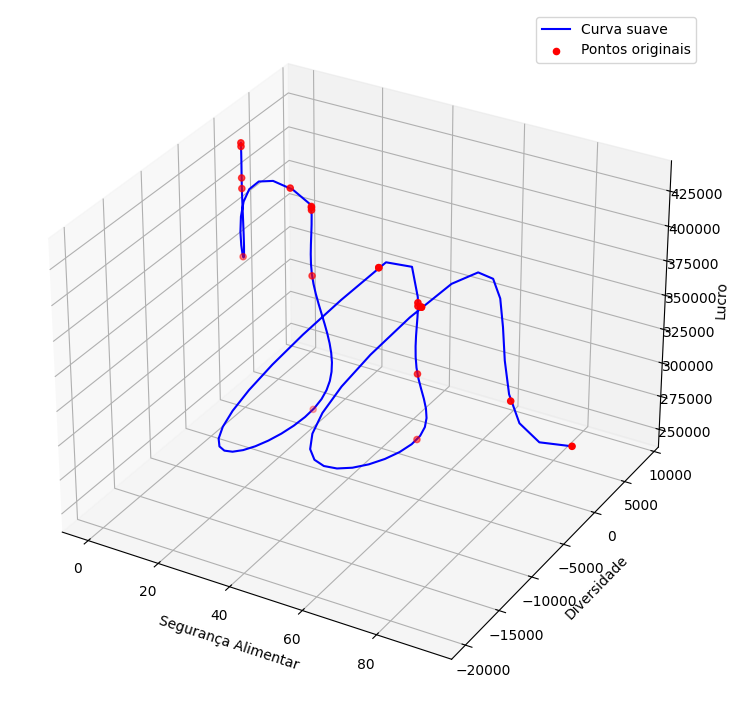

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
from mpl_toolkits.mplot3d import Axes3D

# Atualiza referências dos eixos
df = pd.read_excel(f"{BASE_PATH}/data/plot-data.ods")
x = df["x: segurança"].values
y = df["y: diversidade"].values
z = df["z: lucro"].values

# Passo 1: criar spline paramétrica
tck, u = splprep([x, y, z], s=0)  # s=0 força a curva a passar exatamente pelos pontos

# Passo 2: gerar novos pontos suavizados
u_fine = np.linspace(0, 1, 100)
x_smooth, y_smooth, z_smooth = splev(u_fine, tck)

# Passo 3: plotar
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Curva suavizada
ax.plot(x_smooth, y_smooth, z_smooth, color='blue', label='Curva suave')

# Pontos originais
ax.scatter(x, y, z, color='red', label='Pontos originais')

ax.set_xlabel('Segurança Alimentar')
ax.set_ylabel('Diversidade')
ax.set_zlabel('Lucro')
ax.legend()

plt.show()

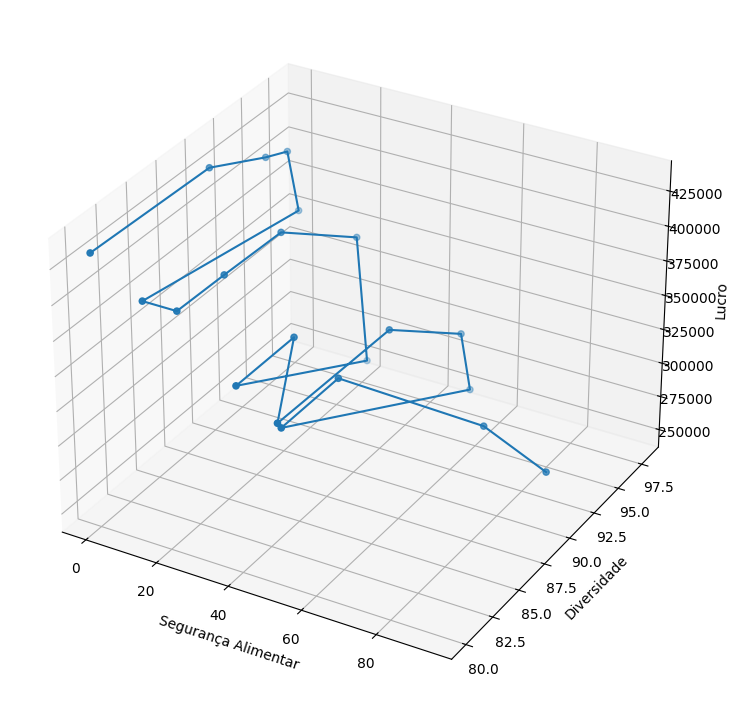

In [8]:

# Criar a figura e o eixo 3D
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos (ou linhas)
ax.plot(x, y, z)  # Pode ser .scatter() se quiser só os pontos
ax.scatter(x, y, z)

# Opcional: rótulos dos eixos
ax.set_xlabel('Segurança Alimentar')
ax.set_ylabel('Diversidade')
ax.set_zlabel('Lucro')

plt.show()

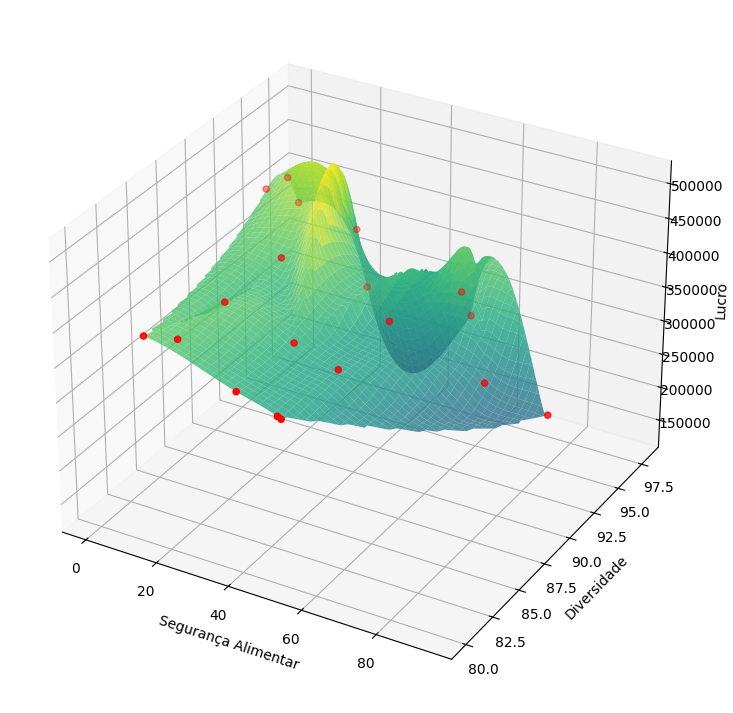

In [23]:
from scipy.interpolate import griddata

x = df["x: segurança"].values[2:]
y = df["y: diversidade"].values[2:]
z = df["z: lucro"].values[2:]

# Geração de grade regular para interpolar
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolação da superfície
zi = griddata((x, y), z, (xi, yi), method='cubic')  # 'linear' e 'nearest' são opções também

# Plotar
fig = plt.figure(figsize=(20, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, zi, cmap='viridis', alpha=0.8)
ax.scatter(x, y, z, color='red')  # pontos originais

ax.set_xlabel('Segurança Alimentar')
ax.set_ylabel('Diversidade')
ax.set_zlabel('Lucro')

plt.show()

In [19]:
df

,x: segurança,y: diversidade,z: lucro
0,0,80,433044
1,0,90,430444
2,0,95,407769
3,0,97,400072
4,0,98,350124
5,14,80,410000
6,20,81,400876
7,20,85,400000
8,20,90,398216
9,20,97,350334
